In [155]:
# Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [156]:
# There are multiple sheets in the excel file : 
data_path = "/home/omkar/Omkar Pawar/Data Science/KPMG Virtual Internship/Data/KPMG_VI_New_raw_data_update_final.xlsx"

## CustomerDemographic

In [157]:
# CustomerDemographic
CustomerDemographic = pd.read_excel(data_path, sheet_name= "CustomerDemographic", header=1)

In [158]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [159]:
# checking for data types:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [160]:
# checking for null values:
CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

#### Primary Notes: 
- `last_name` feature have 124 `NaN` values
- `gender` column have inconsistencies
- `job_title` have 506 `NaN` values
- `job_industry_category` have 656 `NaN` values
- `default` feature looks like mess (drop it)
- `DOB` dtype needs to be changed to `datetime` formate. 

### last_name

In [161]:
# we can combine first name and last name together as full_name:

CustomerDemographic['last_name'].fillna('', inplace=True) # considering those 85 null values
CustomerDemographic['full_name'] = CustomerDemographic['first_name'] + " " + CustomerDemographic['last_name']
CustomerDemographic['full_name']

0           Laraine Medendorp
1                 Eli Bockman
2                Arlin Dearle
3                     Talbot 
4       Sheila-kathryn Calton
                ...          
3995         Rosalia Halgarth
3996            Blanch Nisuis
3997           Sarene Woolley
3998               Patrizius 
3999            Kippy Oldland
Name: full_name, Length: 4000, dtype: object

In [162]:
# this makes first name and last name useless to us:
# so let us drop them...
CustomerDemographic.drop(labels="first_name", axis=1, inplace=True)
CustomerDemographic.drop(labels="last_name", axis=1, inplace=True)

### gender 

In [163]:
# Looking in to inconsistencies in gender feature:
CustomerDemographic['gender'].value_counts()

gender
Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: count, dtype: int64

Recommendation:
-  We can replace Unknown genders by using customer names or we can replace with mode value of gender feature. i.e. 'Female'
-  We can give drop down feature while collecting the data to avoid such data inconsistency mistakes.

In [164]:
# Mapping: 
gender_mapping = {'F': 'Female', 'Femal': 'Female', 'M': 'Male', 'U': 'Female'} # mapping 'U' as 'Female' because that is the mode
CustomerDemographic['gender'] = CustomerDemographic['gender'].replace(gender_mapping)

CustomerDemographic['gender'].value_counts()

gender
Female    2127
Male      1873
Name: count, dtype: int64

---

### DOB 

In [165]:
CustomerDemographic["DOB"].dtype # it is object data type, needs to be converted to datetime

dtype('O')

In [166]:
# changing to datetime format:
CustomerDemographic["DOB"] = pd.to_datetime(CustomerDemographic["DOB"])
CustomerDemographic["DOB"].dtype

dtype('<M8[ns]')

In [167]:
# There are 87 missing values:

# Calculate the mean date
mean_date = CustomerDemographic['DOB'].mean()
print(mean_date)

# Fill missing values with the mean date
CustomerDemographic['DOB'].fillna(mean_date, inplace=True)

1977-07-12 23:56:41.277792


In [168]:
CustomerDemographic.sort_values(by= "DOB",ascending= True).head() 

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,full_name
33,34,Female,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0,Jephthah Bachmann
719,720,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0,Darrel Canet
1091,1092,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0,Katlin Creddon
3409,3410,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16.0,Merrili Brittin
2412,2413,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0,Abbey Murrow


In [169]:
2023-1843 # 180 years old guy? # dude that never died???

180

In [170]:
# for current analysis let us drop that dude from top of the data frame LOL :)
CustomerDemographic = CustomerDemographic[CustomerDemographic['customer_id'] != 34]

---

### job_title 

There are 506 `NaN` values in this feature.

In [171]:
CustomerDemographic['job_title'].value_counts()

job_title
Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: count, Length: 195, dtype: int64

In [172]:
# finding out if there is any connection between nan jot title and job industry: 
CustomerDemographic[CustomerDemographic['job_title'].isna()]['job_industry_category'].value_counts()

job_industry_category
Manufacturing         101
Financial Services     85
Retail                 53
Health                 53
Property               36
IT                     34
Argiculture            14
Entertainment          14
Telecommunications     11
Name: count, dtype: int64

In [173]:
# replacing nan values with mode
job_title_mode = CustomerDemographic['job_title'].mode()[0]
print(job_title_mode)
CustomerDemographic['job_title'].fillna(job_title_mode, inplace=True)

Business Systems Development Analyst


### job_industry_category

There are 656 `NaN` values in this feature.

In [174]:
CustomerDemographic['job_industry_category'].value_counts()


job_industry_category
Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    222
Entertainment         136
Argiculture           113
Telecommunications     72
Name: count, dtype: int64

In [175]:
# replacing nan values with mode:
job_industry_mode = CustomerDemographic['job_industry_category'].mode()[0]
print(job_industry_mode)
CustomerDemographic['job_industry_category'].fillna(job_industry_mode, inplace= True)

Manufacturing


### default 

In [176]:
CustomerDemographic['default'].value_counts()

default
100                                       113
1                                         112
-1                                        111
-100                                       99
Ù¡Ù¢Ù£                                     53
                                         ... 
testâ testâ«                               31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: count, Length: 90, dtype: int64

In [177]:
# This feature looks unnecessary, should be removed
CustomerDemographic.drop(labels="default", axis=1, inplace=True)

### owns_car  

In [178]:
CustomerDemographic['owns_car'].value_counts()

owns_car
Yes    2024
No     1975
Name: count, dtype: int64

In [179]:
# for consistency:
owns_car_maping = {'Yes':1, 'No': 0 }
CustomerDemographic['owns_car'] = CustomerDemographic['owns_car'].replace(owns_car_maping, regex= True)
CustomerDemographic['owns_car'].value_counts()

owns_car
1    2024
0    1975
Name: count, dtype: int64

### tenure 

In [180]:
mean_tenure = CustomerDemographic['tenure'].mean()
mean_tenure

10.65465235173824

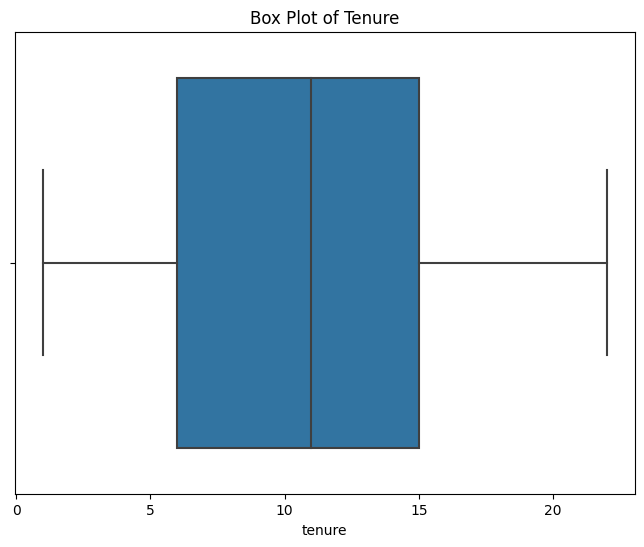

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot to visualize the distribution and outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=CustomerDemographic['tenure'])
plt.title('Box Plot of Tenure')
plt.show()


There are no outliers so we can replace `nan` values with mean 

In [182]:
# replacing nan values with mean: 
CustomerDemographic['tenure'] = CustomerDemographic['tenure'].fillna(mean_tenure)

### wealth_segment

In [183]:
CustomerDemographic['wealth_segment'].value_counts()

wealth_segment
Mass Customer        2000
High Net Worth       1021
Affluent Customer     978
Name: count, dtype: int64

In [184]:
# rechecking to find null values: 
CustomerDemographic.isnull().sum()

customer_id                            0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
full_name                              0
dtype: int64

In [185]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3999 non-null   int64         
 1   gender                               3999 non-null   object        
 2   past_3_years_bike_related_purchases  3999 non-null   int64         
 3   DOB                                  3999 non-null   datetime64[ns]
 4   job_title                            3999 non-null   object        
 5   job_industry_category                3999 non-null   object        
 6   wealth_segment                       3999 non-null   object        
 7   deceased_indicator                   3999 non-null   object        
 8   owns_car                             3999 non-null   int64         
 9   tenure                               3999 non-null   float64       
 10  full_name        

### deceased_indicator

In [186]:
CustomerDemographic['deceased_indicator'].value_counts()

deceased_indicator
N    3997
Y       2
Name: count, dtype: int64

In [187]:
# for consistency:
deceased_indicator_maping = {'Y':1, 'N': 0 }
CustomerDemographic['deceased_indicator'] = CustomerDemographic['deceased_indicator'].replace(deceased_indicator_maping, regex= True)
CustomerDemographic['deceased_indicator'].value_counts()

deceased_indicator
0    3997
1       2
Name: count, dtype: int64

In [188]:
CustomerDemographic.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,full_name
0,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,1,11.0,Laraine Medendorp
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,0,1,16.0,Eli Bockman
2,3,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,0,1,15.0,Arlin Dearle
3,4,Male,33,1961-10-03,Business Systems Development Analyst,IT,Mass Customer,0,0,7.0,Talbot
4,5,Female,56,1977-05-13,Senior Editor,Manufacturing,Affluent Customer,0,1,8.0,Sheila-kathryn Calton


- Now our data looks healthy and clean :)

-------------

## CustomerAddress

In [189]:
# CustomerAddress
CustomerAddress = pd.read_excel(data_path, sheet_name= "CustomerAddress", header= 1)

In [190]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [191]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


### state

In [192]:
CustomerAddress['state'].value_counts()

state
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: count, dtype: int64

Victoria (commonly abbreviated as Vic) is a state in southeastern Australia.

- https://en.wikipedia.org/wiki/Victoria_(Australia)

New South Wales (commonly abbreviated as NSW) is a state on the east coast of Australia
- https://en.wikipedia.org/wiki/New_South_Wales

In [193]:
state_mapping = {'Victoria': 'VIC', 'VIC state': 'VIC', 'New South Wales': 'NSW'} 
CustomerAddress['state'] = CustomerAddress['state'].replace(state_mapping)

CustomerAddress['state'].value_counts()

state
NSW    2140
VIC    1021
QLD     838
Name: count, dtype: int64

Awesome !!! It is clean data. 

---------------

## Transactions 

In [194]:
# Transactions
Transactions = pd.read_excel(data_path, sheet_name= "Transactions", header= 1)


In [195]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [196]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [197]:
# looking for null values:
Transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

### online_order

In [198]:
Transactions['online_order'].value_counts()

online_order
1.0    9829
0.0    9811
Name: count, dtype: int64

- difference between two values is very less we can choose to drop null values. 

In [199]:
# dropping the null values:
Transactions = Transactions[Transactions['online_order'].notnull()]

In [200]:
# we can change values to boolean for online order 
# Transactions['online_order'] = Transactions['online_order'].astype(bool)

In [201]:
Transactions['online_order'].value_counts()

online_order
1.0    9829
0.0    9811
Name: count, dtype: int64

### order_status 

In [202]:
Transactions['order_status'].value_counts()

order_status
Approved     19467
Cancelled      173
Name: count, dtype: int64

### Product Details

In [203]:
features = ['brand', 'product_line', 'product_class', 'product_size']

In [204]:
# Loop over features and print unique values
for feature in features:
    unique_values = Transactions[feature].unique()
    print(f"{feature}: {unique_values}")

brand: ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
product_line: ['Standard' 'Road' 'Mountain' 'Touring' nan]
product_class: ['medium' 'low' 'high' nan]
product_size: ['medium' 'large' 'small' nan]


In [205]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


Recommendations: We can replace `nan` with mode values for `product_class` and `product_size`.

Recommendation: We can drop these `197` rows because they have `nan` values for these 6 features.

In [206]:
# we will be dropping these values for now.
features = ['brand', 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date']
Transactions = Transactions[~pd.isna(Transactions[features]).all(axis=1)] # any (OR), all (AND) , ~ (NOT) 
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [207]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 non-nu

Note: `customer_id` is common feature between all 4 sheets. 

------------

### combining data together for further analysis:

In [208]:
CustomerDemographic.shape

(3999, 11)

In [209]:
CustomerAddress.shape

(3999, 6)

In [210]:
Transactions.shape

(19445, 13)

In [211]:
merged_df = pd.merge(Transactions, CustomerDemographic, on="customer_id", how='inner')
merged_df.shape

(19434, 23)

There is chance that we don't have data for few Customers regarding demographics and address.

In [212]:
final_df = pd.merge(merged_df, CustomerAddress, on="customer_id", how='inner')
final_df.shape

(19408, 28)

In [213]:
final_df.isnull().sum()

transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
full_name                              0
address                                0
postcode        

In [230]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19408 entries, 0 to 19407
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19408 non-null  int64         
 1   product_id                           19408 non-null  int64         
 2   customer_id                          19408 non-null  int64         
 3   transaction_date                     19408 non-null  datetime64[ns]
 4   online_order                         19408 non-null  float64       
 5   order_status                         19408 non-null  object        
 6   brand                                19408 non-null  object        
 7   product_line                         19408 non-null  object        
 8   product_class                        19408 non-null  object        
 9   product_size                         19408 non-null  object        
 10  list_price

saving the changes into new excel file for old customer data : 

In [231]:
file_path = "/home/omkar/Omkar Pawar/Data Science/KPMG Virtual Internship/Data/cleaned_old_customer_data.xlsx"
final_df.to_excel(file_path)

-------

## NewCustomerList

In [237]:
import pandas as pd
# NewCustomerList
NewCustomerList = pd.read_excel(data_path, sheet_name= "NewCustomerList", header= 1)

In [238]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [239]:
NewCustomerList.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

### unnammed 

In [240]:
# unnamed?
NewCustomerList.iloc[0:5,16:21]
columns_to_drop = ['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20']
NewCustomerList.drop(columns=columns_to_drop, inplace=True)

### last_name

In [241]:
# we can combine first name and last name together as full_name
NewCustomerList['last_name'].fillna('', inplace=True) # considering those null values

NewCustomerList['full_name'] = NewCustomerList['first_name'] + " " + NewCustomerList['last_name']

In [242]:
# this makes first name and last name of no use to us:
# so let us drop these two
NewCustomerList.drop(labels="first_name", axis=1, inplace=True)
NewCustomerList.drop(labels="last_name", axis=1, inplace=True)

### DOB

In [245]:
# DOB
NewCustomerList["DOB"] = pd.to_datetime(NewCustomerList["DOB"])
print(NewCustomerList["DOB"].dtype)


DOB_mean = NewCustomerList['DOB'].mean()
print(DOB_mean)


NewCustomerList['DOB'].fillna(DOB_mean, inplace=True)

datetime64[ns]
1971-04-20 14:05:14.954221768


### job_industry_category

In [247]:
job_industry_mode = NewCustomerList['job_industry_category'].mode()[0]
print(job_title_mode)
NewCustomerList['job_industry_category'].fillna(job_industry_mode, inplace=True)

Financial Services


### job_title

In [249]:
job_title_mode = NewCustomerList['job_title'].mode()[0]
print(job_title_mode)
NewCustomerList['job_title'].fillna(job_title_mode, inplace=True)

Associate Professor


In [250]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   gender                               1000 non-null   object        
 1   past_3_years_bike_related_purchases  1000 non-null   int64         
 2   DOB                                  1000 non-null   datetime64[ns]
 3   job_title                            1000 non-null   object        
 4   job_industry_category                1000 non-null   object        
 5   wealth_segment                       1000 non-null   object        
 6   deceased_indicator                   1000 non-null   object        
 7   owns_car                             1000 non-null   object        
 8   tenure                               1000 non-null   int64         
 9   address                              1000 non-null   object        
 10  postcode     

### gender

In [251]:
NewCustomerList['gender'].value_counts()

gender
Female    513
Male      470
U          17
Name: count, dtype: int64

In [252]:
gender_mapping = { 'U': 'Female'} # mapping 'U' as 'Female' because that is the mode
NewCustomerList['gender'] = NewCustomerList['gender'].replace(gender_mapping)

NewCustomerList['gender'].value_counts()

gender
Female    530
Male      470
Name: count, dtype: int64

In [229]:
file_path = "/home/omkar/Omkar Pawar/Data Science/KPMG Virtual Internship/Data/cleaned_new_customer_data.xlsx"
NewCustomerList.to_excel(file_path)

--------------

### Aditional Data

https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026